# Data Cleaning Project I

This notebook contains my attempt to clean a bicycle sharing data collected in San Francisco and also perform some analysis on the data to answer some few questions. There are many questions that could be asked of this data but I will only ask a few and try to answer them using: 
- NumPy
- Python
- Pandas
- Matplotlib
- Seaborn

Some the questions are as follows:
- What are the ages of the riders?
- Which stations are the most popular ones?
- Which age group ride more?
- Which days of the week experience more rides?
- Which months are the busiest? 
- and more...

I will try to answer all these questions in particular order and might even formulate other questions and answer them as I go along the project. I am open to opinions and suggestions. 

I hope you enjoy the ride. 

#### Why Data Cleaning is Important
Without properly cleaned data, the results of any data analysis or machine learning model could be inaccurate. It is a commonly known fact that data scientists spend 80% of their time cleaning, manipulating and transforming data into the shape they want in order to carry out accurate analysis.

##### Some common problems with data:
- Column headers are variables, not variable names
- Multiple variables are stored in one column
- Variables are stored in both rows and columns
- Multiple types of observational units are stored in the same table
- A single observational unit stored in multiple tables

In this project efforts will be made to deal with and overcome some common untidy data problems.

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset into a dataframe called ride_sharing
ride_sharing = pd.read_csv('../Datasets/ride_sharing_new.csv')
#Viewing the first 3 rows of the dataset
ride_sharing.head(3)

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male


The dataset above is a bicycle ride sharing data from San Francisco. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The user_type column contains information on whether a user is taking a free ride and takes on the following values:

- 1 for free riders.

- 2 for pay per ride.

- 3 for monthly subscribers.  

In [3]:
#Printing information about the ride_sharing dataset
print(ride_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None


It can be observed that the dataset has 10 columns 25760 rows and mixed data types. The user_type column should be categorical and nto integer.

In [4]:
#Summary statistics of the user_type column
print(ride_sharing['user_type'].describe())

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


The Summary Statistics shown above is not very informative.

In [5]:
#Converting the user_type column to category and storing it in a new column 'user_type_cat'
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

#Confirming the change with an assert statement. The assert statement will return nothing if the assertion is true and an error otherwise
assert ride_sharing['user_type_cat'].dtype == 'category'

print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


The Summary Statistics printed now is more useful because it gives the following information:
- there 3 unique categories
- the most occuring categoriy is 2 and it occurs 12972 times

In [6]:
#Looking at the 'duration' column in the dataset (first 5 rows)
ride_sharing['duration'][0:5]

0    12 minutes
1    24 minutes
2     8 minutes
3     4 minutes
4    11 minutes
Name: duration, dtype: object

It is observed that the duration is measured in minutes and as data scientist we would perhaps want to perform some numerical computations as finding the mean or the sum. This will not be possible because the column is saved with a string data type. In order to recode the column to a numeralcal one, the 'minutes' string needs to stripped off.

In [7]:
#Stripping off the minutes in the duration column and saving it in a new column 'duration_trim'
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

#Convert the new column into one with dtype of integer 
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

#Confirming the change with an assert statement
assert ride_sharing['duration_time'].dtype == 'int'

print(ride_sharing['duration_time'][0:5])
print('The average duration time is {:.2f} minutes'.format(np.mean(ride_sharing['duration_time'])))

0    12
1    24
2     8
3     4
4    11
Name: duration_time, dtype: int64
The average duration time is 11.39 minutes


##### We later received some extra data on the bicycle tire sizes, and this is stored in a list in other file. This list must be added as a colum to our dataset. The name of the file is extra.py

In [8]:
#Importing the file 
from extras import tire_sizes

ride_sharing['tire_sizes'] = tire_sizes
ride_sharing['tire_sizes'][0:5]

0    28
1    26
2    27
3    28
4    28
Name: tire_sizes, dtype: int64

In [9]:
#Printing information about the ride_sharing dataset
print(ride_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       25760 non-null  int64   
 1   duration         25760 non-null  object  
 2   station_A_id     25760 non-null  int64   
 3   station_A_name   25760 non-null  object  
 4   station_B_id     25760 non-null  int64   
 5   station_B_name   25760 non-null  object  
 6   bike_id          25760 non-null  int64   
 7   user_type        25760 non-null  int64   
 8   user_birth_year  25760 non-null  int64   
 9   user_gender      25760 non-null  object  
 10  user_type_cat    25760 non-null  category
 11  duration_trim    25760 non-null  object  
 12  duration_time    25760 non-null  int64   
 13  tire_sizes       25760 non-null  int64   
dtypes: category(1), int64(8), object(5)
memory usage: 2.6+ MB
None


In [10]:
#Converting tire sizes dtype to category
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

#Confirming the change with an assert statement
assert ride_sharing['tire_sizes'].dtype == 'category'

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″. Let's select bicycles with tire sizes above 27 and set them to 27. But before that can be done we need to convert the data type of the tire sizes column to integer

In [11]:
# Converting tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27
print(ride_sharing[ride_sharing['tire_sizes'] > 27])

Empty DataFrame
Columns: [Unnamed: 0, duration, station_A_id, station_A_name, station_B_id, station_B_name, bike_id, user_type, user_birth_year, user_gender, user_type_cat, duration_trim, duration_time, tire_sizes]
Index: []


In [12]:
# Reconverting tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

print('The different tire sizes present are {}'.format(ride_sharing['tire_sizes'].unique()))

count     25760
unique        2
top          27
freq      19365
Name: tire_sizes, dtype: int64
The different tire sizes present are [27, 26]
Categories (2, int64): [27, 26]


##### The extras file has again been updated with the date and time information for each ride. It is required that this new information is incorporated in the dataset as a new column.  The dates were randomly generated for the sake of learning. The code for generating the random dates is in the next cell

In [13]:
import random
from datetime import datetime, timedelta

random.seed(10)
min_year=2017
max_year=datetime.now().year

start = datetime(min_year, 1, 1, 00, 00, 00)
years = max_year - min_year+2
end = start + timedelta(days=365 * years)

dates_list = []
for i in range(25760):
    random_date = start + (end - start) * random.random()
    dates_list.append(random_date)
    
date_strings = []
for date in dates_list:
    date_string = date.strftime('%m-%d-%Y')
    date_strings.append(date_string)

In [14]:
#Saving the date time information in a column called 'ride_date'
ride_sharing['ride_date'] = date_strings
ride_sharing.head(4)

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat,duration_trim,duration_time,tire_sizes,ride_date
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2,12,12,27,06-05-2020
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2,24,24,26,07-29-2019
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3,8,8,27,06-20-2020
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1,4,4,27,03-28-2018


A bug was discovered where all rides taken today were recorded as taken next year. To remedy this we will go through the new column, select all dates in the future and set them to today.

In [15]:
import datetime as dt
# Convert ride_date to datetime
ride_sharing['ride_date'] = pd.to_datetime(ride_sharing['ride_date'])

# Save today's date
today = pd.Timestamp('today')

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_date'] > today, 'ride_date'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_date'].max())
print(today)

2021-03-26 15:43:24.435862
2021-03-26 15:43:24.435862


In [16]:
ride_sharing.head(3)

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat,duration_trim,duration_time,tire_sizes,ride_date
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2,12,12,27,2020-06-05
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2,24,24,26,2019-07-29
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3,8,8,27,2020-06-20


As can be seen there are columns that are no longer needed in the dataset. We have to drop them.

In [17]:
#Dropping the unnecessary columns
cols_to_go = ['Unnamed: 0', 'user_type', 'duration_trim']
ride_sharing.drop(cols_to_go, axis = 1, inplace = True)

In [18]:
#ride_sharing['user_type'] = ride_sharing['user_type_cat']
ride_sharing.head(3)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_birth_year,user_gender,user_type_cat,duration_time,tire_sizes,ride_date
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,1959,Male,2,12,27,2020-06-05
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,1965,Male,2,24,26,2019-07-29
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,1993,Male,3,8,27,2020-06-20


The client asked for analysis to be done only on 78 users and also provided ride ids with updated user birth years, duration time. The ride ids and the updated user birth years have been provided in the extras file.

In [19]:
#Selecting 78 the first 78 rows
ride_sharing_sub = ride_sharing.loc[0:77, :].copy()
ride_sharing_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   duration         78 non-null     object        
 1   station_A_id     78 non-null     int64         
 2   station_A_name   78 non-null     object        
 3   station_B_id     78 non-null     int64         
 4   station_B_name   78 non-null     object        
 5   bike_id          78 non-null     int64         
 6   user_birth_year  78 non-null     int64         
 7   user_gender      78 non-null     object        
 8   user_type_cat    78 non-null     category      
 9   duration_time    78 non-null     int64         
 10  tire_sizes       78 non-null     category      
 11  ride_date        78 non-null     datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(5), object(4)
memory usage: 6.6+ KB


In [20]:
ride_sharing_sub.head(2)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_birth_year,user_gender,user_type_cat,duration_time,tire_sizes,ride_date
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,1959,Male,2,12,27,2020-06-05
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,1965,Male,2,24,26,2019-07-29


In [21]:
#Dropping columns that have been updated so that we can insert the updates as new columns
cols_to_del = ['user_birth_year', 'duration_time', 'duration']
ride_sharing_sub.drop(cols_to_del, axis = 1, inplace = True)

In [22]:
ride_sharing_sub.head(3)

,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_gender,user_type_cat,tire_sizes,ride_date
0,81,Berry St at 4th St,323,Broadway at Kearny,5480,Male,2,27,2020-06-05
1,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,Male,2,26,2019-07-29
2,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,Male,3,27,2020-06-20


In [23]:
ride_sharing_sub.columns

Index(['station_A_id', 'station_A_name', 'station_B_id', 'station_B_name',
       'bike_id', 'user_gender', 'user_type_cat', 'tire_sizes', 'ride_date'],
      dtype='object')

In [24]:
#importing the updates from the extras file
from extras import ids, duration, birth_year 

#Inserting the new ids as a column into the dataset in location 0
ride_sharing_sub.insert(loc = 0, column = 'ride_id', value = ids)

#Updating the duration time with the new values 
ride_sharing_sub.insert(loc = 8, column = 'duration', value = duration)

#Updating the user birth years with the updated birth years
ride_sharing_sub.insert(loc = 7, column = 'user_birth_year', value = birth_year)

In [25]:
ride_sharing_sub.head(2)

,ride_id,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_gender,user_birth_year,user_type_cat,duration,tire_sizes,ride_date
0,0,81,Berry St at 4th St,323,Broadway at Kearny,5480,Male,1988,2,11,27,2020-06-05
1,1,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,Male,1988,2,8,26,2019-07-29


The updates provided by the file however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the ride_sharing DataFrame.

In [26]:
# Find duplicates
duplicates = ride_sharing_sub.duplicated(subset = 'ride_id', keep = False)
print(duplicates)

0     False
1     False
2     False
3     False
4     False
      ...  
73    False
74     True
75     True
76     True
77     True
Length: 78, dtype: bool


In [27]:
# Sort your duplicated rides
duplicated_rides = ride_sharing_sub[duplicates].sort_values(by = 'ride_id')
duplicated_rides.head()

,ride_id,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_gender,user_birth_year,user_type_cat,duration,tire_sizes,ride_date
22,33,5,Powell St BART Station (Market St at 5th St),356,Valencia St at Clinton Park,2165,Male,1979,2,10,27,2017-10-19 00:00:00.000000
39,33,30,San Francisco Caltrain (Townsend St at 4th St),130,22nd St Caltrain Station,5213,Male,1979,1,2,27,2021-03-26 15:43:24.435862
53,55,21,Montgomery St BART Station (Market St at 2nd St),78,Folsom St at 9th St,1502,Female,1985,2,9,27,2017-09-05 00:00:00.000000
65,55,16,Steuart St at Market St,93,4th St at Mission Bay Blvd S,5392,Male,1985,2,9,27,2017-09-19 00:00:00.000000
74,71,67,San Francisco Caltrain Station 2 (Townsend St...,90,Townsend St at 7th St,1920,Male,1997,2,11,27,2017-01-11 00:00:00.000000


In [28]:
# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

    ride_id  duration  user_birth_year
22       33        10             1979
39       33         2             1979
53       55         9             1985
65       55         9             1985
74       71        11             1997
75       71        11             1997
76       89         9             1986
77       89         9             2060


In [29]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing_sub.drop_duplicates()
ride_dup[ride_dup.duplicated(subset = 'ride_id', keep = False)]

,ride_id,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_gender,user_birth_year,user_type_cat,duration,tire_sizes,ride_date
22,33,5,Powell St BART Station (Market St at 5th St),356,Valencia St at Clinton Park,2165,Male,1979,2,10,27,2017-10-19 00:00:00.000000
39,33,30,San Francisco Caltrain (Townsend St at 4th St),130,22nd St Caltrain Station,5213,Male,1979,1,2,27,2021-03-26 15:43:24.435862
53,55,21,Montgomery St BART Station (Market St at 2nd St),78,Folsom St at 9th St,1502,Female,1985,2,9,27,2017-09-05 00:00:00.000000
65,55,16,Steuart St at Market St,93,4th St at Mission Bay Blvd S,5392,Male,1985,2,9,27,2017-09-19 00:00:00.000000
74,71,67,San Francisco Caltrain Station 2 (Townsend St...,90,Townsend St at 7th St,1920,Male,1997,2,11,27,2017-01-11 00:00:00.000000
75,71,21,Montgomery St BART Station (Market St at 2nd St),58,Market St at 10th St,316,Female,1997,2,11,27,2021-03-26 15:43:24.435862
76,89,22,Howard St at Beale St,72,Page St at Scott St,5162,Female,1986,2,9,27,2018-12-28 00:00:00.000000
77,89,21,Montgomery St BART Station (Market St at 2nd St),64,5th St at Brannan St,1299,Male,2060,2,9,27,2018-12-01 00:00:00.000000


In [30]:
# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()
ride_unique

,ride_id,user_birth_year,duration
0,0,1988,11
1,1,1988,8
2,2,1988,11
3,3,1969,7
4,4,1986,11
...,...,...,...
69,94,1993,25
70,95,1959,11
71,96,1991,7
72,98,1989,21


In [31]:
# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

There is a user with birth year set as 2060. It was found out that his actual birth year is 1992.

In [32]:
#Setting the birth year from 2060 to 1992
ride_sharing_sub.loc[ride_sharing_sub['user_birth_year'] == 2060, 'user_birth_year'] = 1992

In [33]:
ride_sharing_sub.tail()

,ride_id,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_gender,user_birth_year,user_type_cat,duration,tire_sizes,ride_date
73,99,3,Powell St BART Station (Market St at 4th St),6,The Embarcadero at Sansome St,443,Female,1968,1,15,27,2019-08-11 00:00:00.000000
74,71,67,San Francisco Caltrain Station 2 (Townsend St...,90,Townsend St at 7th St,1920,Male,1997,2,11,27,2017-01-11 00:00:00.000000
75,71,21,Montgomery St BART Station (Market St at 2nd St),58,Market St at 10th St,316,Female,1997,2,11,27,2021-03-26 15:43:24.435862
76,89,22,Howard St at Beale St,72,Page St at Scott St,5162,Female,1986,2,9,27,2018-12-28 00:00:00.000000
77,89,21,Montgomery St BART Station (Market St at 2nd St),64,5th St at Brannan St,1299,Male,1992,2,9,27,2018-12-01 00:00:00.000000


The Dataset is now clean for analysis

In [83]:
print('The longest ride is {} minutes long.'.format(ride_sharing_sub['duration'].max()))

The longest ride is 68 minutes long.


#### Analysing The Data Set for Insights

Now that the dataset is clean, we can perform some analysis on it to gain some insights. Some the questions that can be asked of the data include:
- What are the ages of the riders (The oldest and youngest riders)
- Which stations are popular (have the most rides starting from there or ending there)
- What age group of riders have the more rides
- Which days of the week are the busiest ( also which months)
- Which bikes have had more rides.

All these questions can be answered and that is what I will do in the next few cells and in no particular order.

## User Categories
There are 3 types of users. 

- 1 for free riders.

- 2 for pay per ride.

- 3 for monthly subscribers.

One of the questions that can asked here is, which of the user types have had more rides?

In [131]:
#Selecting information on all user types in the dataset
free_riders = ride_sharing_sub[ride_sharing_sub['user_type_cat'] == 1]['duration']
pay_per_ride = ride_sharing_sub[ride_sharing_sub['user_type_cat'] == 2]['duration']
monthly_subs = ride_sharing_sub[ride_sharing_sub['user_type_cat'] == 3]['duration']

print('The total minutes spent by free riders riders is {}'.format(free_riders.sum()))
print('The total minutes spent by pay per ride riders riders is {}'.format(pay_per_ride.sum()))
print('The total minutes spent by monthly subscriber riders riders is {}'.format(monthly_subs.sum()))

The total minutes spent by free riders riders is 243
The total minutes spent by pay per ride riders riders is 386
The total minutes spent by monthly subscriber riders riders is 131


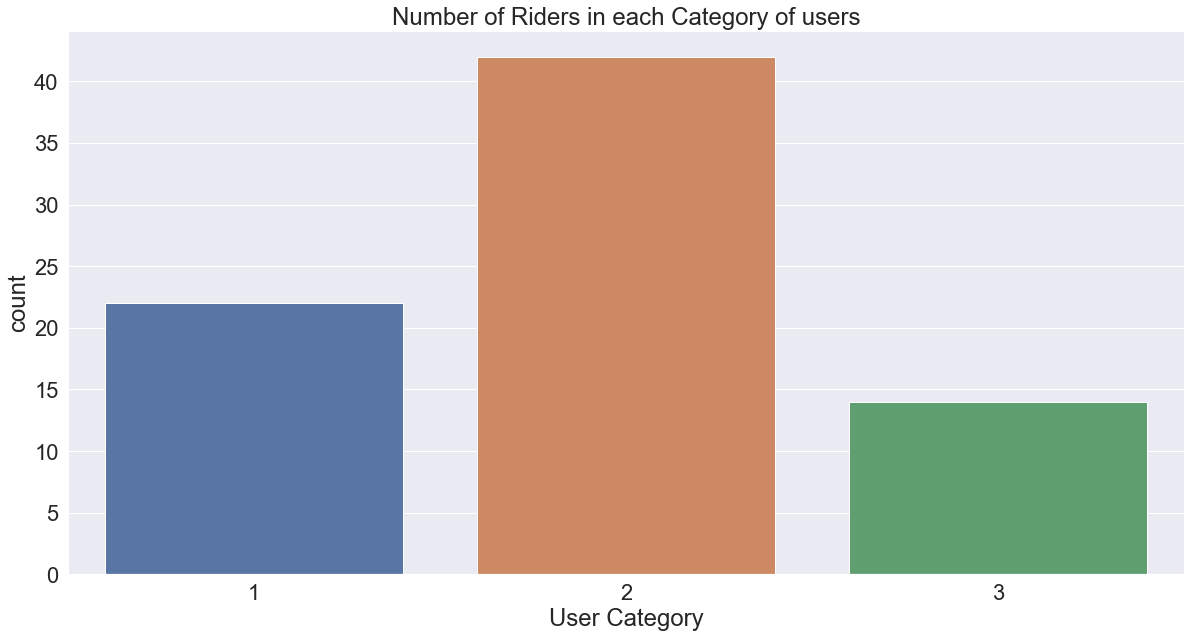

In [162]:
plt.figure(figsize = (20,10))
sns.countplot(data = ride_sharing_sub, x = 'user_type_cat')
plt.xlabel('User Category')
plt.title('Number of Riders in each Category of users')
plt.show()

There are more pay per ride users in the dataset than any other kind of users.

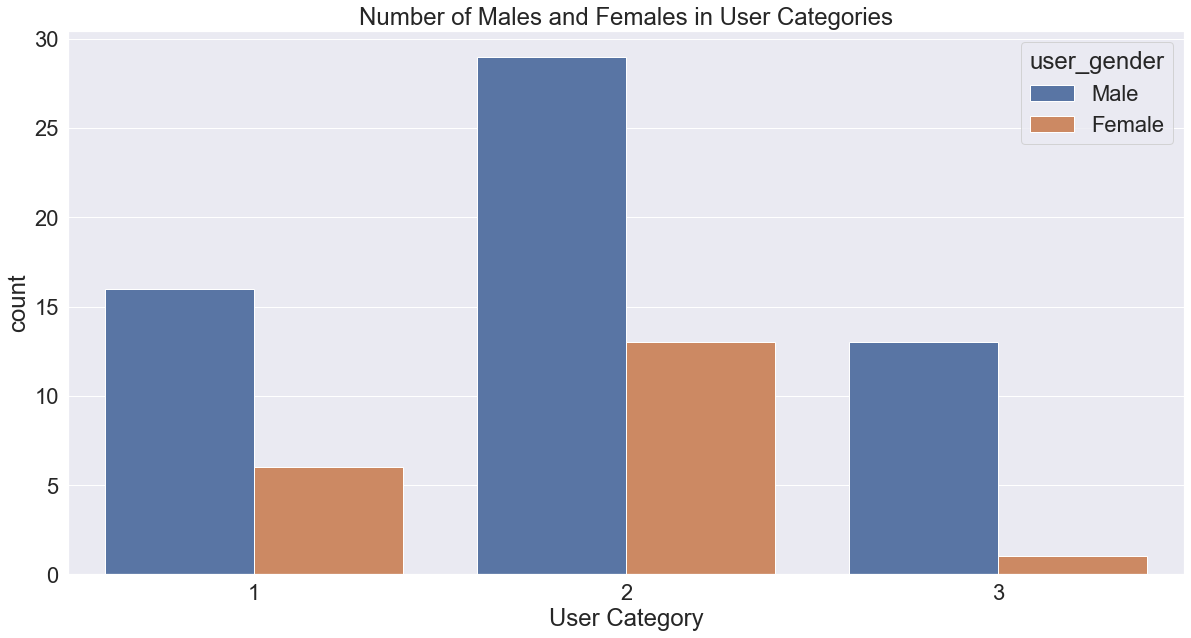

In [161]:
plt.figure(figsize = (20,10))
sns.countplot(data = ride_sharing_sub, x = 'user_type_cat', hue = 'user_gender')
plt.xlabel('User Category')
plt.title('Number of Males and Females in User Categories')
plt.show()

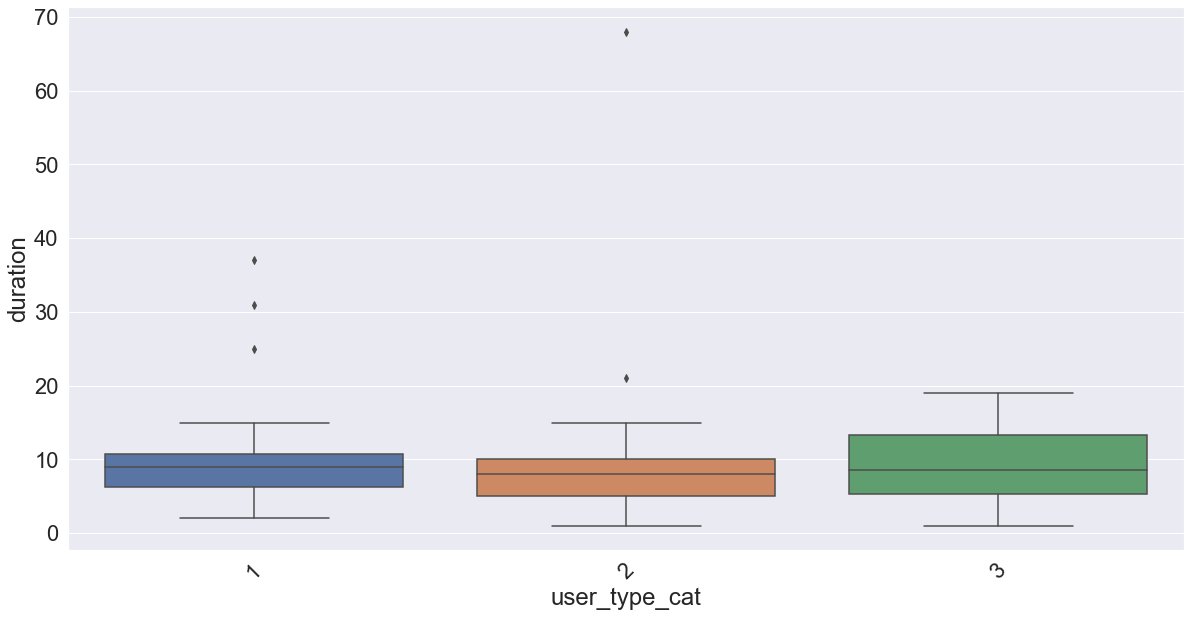

In [140]:
plt.figure(figsize = (20,10))
sns.boxplot(data = ride_sharing_sub, x = 'user_type_cat', y = 'duration')
plt.xticks(rotation = 45)
plt.show()

From the boxplot above it can be seen that for free riders, there are 3 riders who have ride durations way above the the normal phenomenon in the dataset. The same goes for Pay per ride riders, 2 riders have ride durations above the normal. These could be truly outliers or it could mean that they are actual people who made these rides. I will leave those data points untouched. 

Again, from the plot it can seen that boxes for each category lie in similar ranges and there is no clear difference in what is happening in the categories when it comes to ride durations. This means that user category is not associated to ride durations - this means that knowing a rider's category does not provide information or give an idea to what his ride duration might be. 

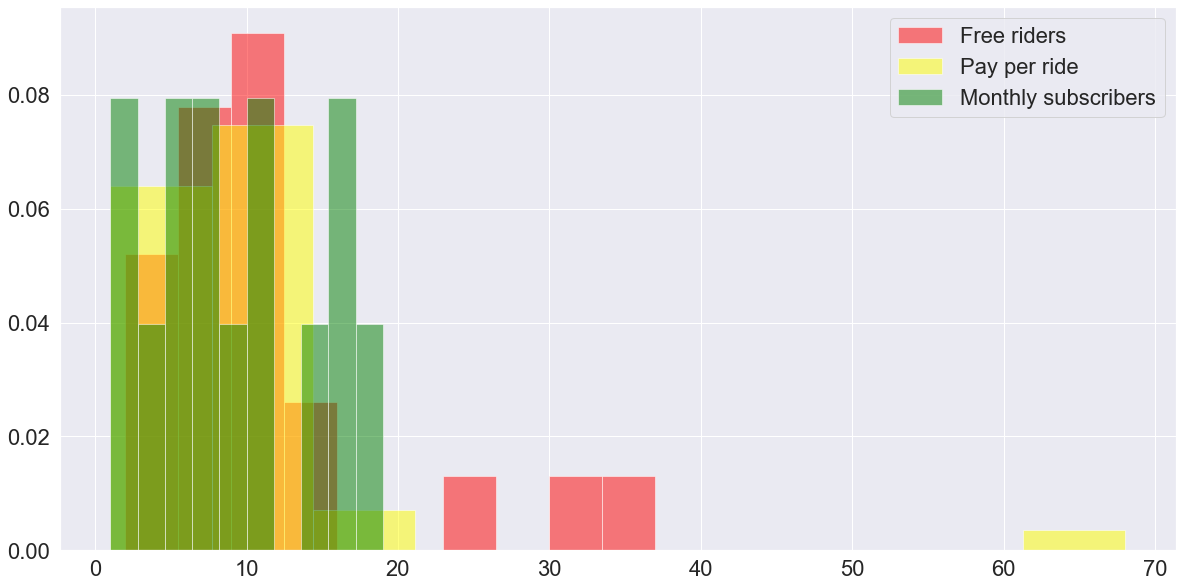

In [143]:
plt.figure(figsize = (20, 10))
plt.hist(free_riders, alpha = 0.5, color = 'red', label = 'Free riders', density = True)
plt.hist(pay_per_ride, alpha = 0.5, color = 'yellow', label = 'Pay per ride', density = True)
plt.hist(monthly_subs, alpha = 0.5, color = 'green', label = 'Monthly subscribers', density = True)
plt.legend()
plt.show()

## User Ages
The user ages can be calculated by subtracting their birth years from the current year. This can be done using a `lambda` function to create a new column called `user_age`. 

In [35]:
#Calculating user ages using a lambda (anonimous) function
ride_sharing_sub['user_age'] = ride_sharing_sub.apply(lambda row: today.year - row['user_birth_year'], axis = 1)

In [36]:
ride_sharing_sub.head(3)

,ride_id,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_gender,user_birth_year,user_type_cat,duration,tire_sizes,ride_date,user_age
0,0,81,Berry St at 4th St,323,Broadway at Kearny,5480,Male,1988,2,11,27,2020-06-05,33
1,1,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,Male,1988,2,8,26,2019-07-29,33
2,2,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,Male,1988,3,11,27,2020-06-20,33


In [37]:
#General statistics of the ages of the riders
user_ages = ride_sharing_sub['user_age'].values
mean_age = np.mean(user_ages)
youngest_age = np.min(user_ages)
oldest_age = np.max(user_ages)
print('The average age of the riders is {:.2f}'.format(mean_age))
print('The youngest rider is {} years old'.format(youngest_age))
print('The oldest rider is {} years old'.format(oldest_age))

The average age of the riders is 37.37
The youngest rider is 24 years old
The oldest rider is 79 years old


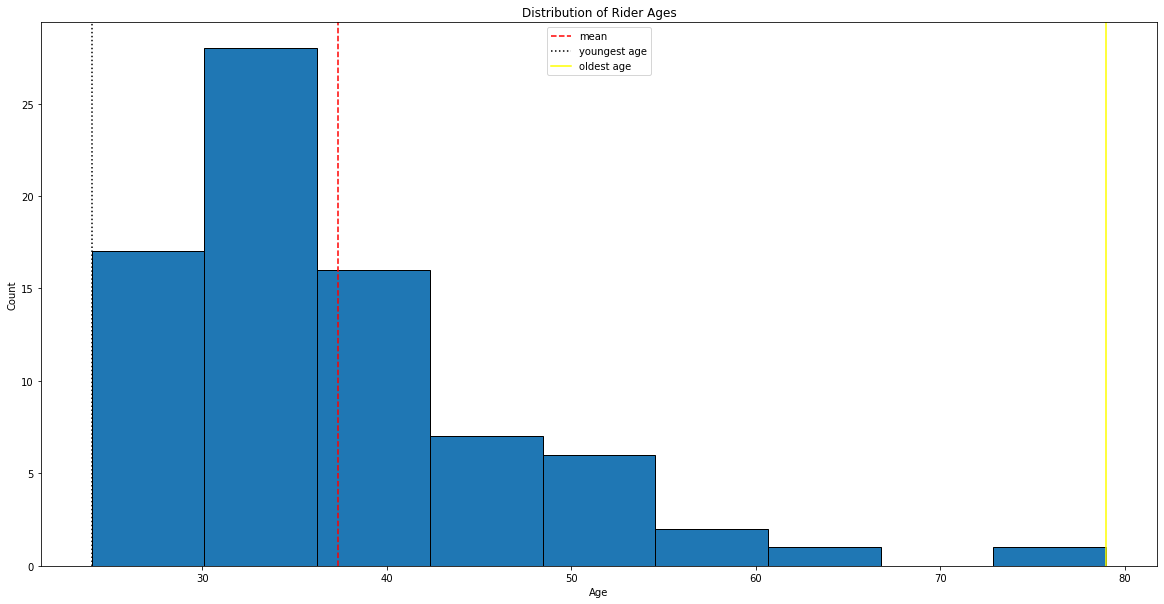

In [38]:
#Setting the number of bins for the histogram
n_bins = round(np.sqrt(len(user_ages)))
#Plotting the age distributions
plt.figure(figsize = (20, 10))
plt.hist(user_ages, edgecolor = 'black', bins = n_bins)
plt.axvline(mean_age, color = 'red', label = 'mean', linestyle = 'dashed')
plt.axvline(youngest_age, color = 'black', label = 'youngest age', linestyle = 'dotted')
plt.axvline(oldest_age, color = 'yellow', label = 'oldest age', linestyle = 'solid')
plt.title('Distribution of Rider Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

To gain a better understanding of the how the differently aged riders are interacting with the services, it will be better to create an range range and analyse what happens within these ranges. 

In [72]:
#Binning the ages
bins = [20, 30, 40, 50, 60, 70]
labels = ['Young Adult', 'Middle Adult', 'Middle old', 'Senior', 'Old']

ride_sharing_sub['age_group'] = pd.cut(ride_sharing_sub['user_age'], bins, labels = labels)
ride_sharing_sub.head(3)

,ride_id,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_gender,user_birth_year,user_type_cat,duration,tire_sizes,ride_date,user_age,age_group
0,0,81,Berry St at 4th St,323,Broadway at Kearny,5480,Male,1988,2,11,27,2020-06-05,33,Middle Adult
1,1,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,Male,1988,2,8,26,2019-07-29,33,Middle Adult
2,2,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,Male,1988,3,11,27,2020-06-20,33,Middle Adult


In [73]:
ride_sharing_sub['age_group'].value_counts()

Middle Adult    39
Young Adult     17
Middle old      14
Senior           6
Old              1
Name: age_group, dtype: int64

- Young Adult : 20 to 30 years
- Middle Adult : 30 to 40 years
- Middle Old : 40 to 50 years
- Senior : 50 to 60 years
- Old : 60 and above

NB: These age groups created and named here do not follow any conventions. Just my own thoughts for the purpose of learning and practice.

Most riders are between the ages of 30 to 40 years. 

Text(0, 0.5, 'Age Group')

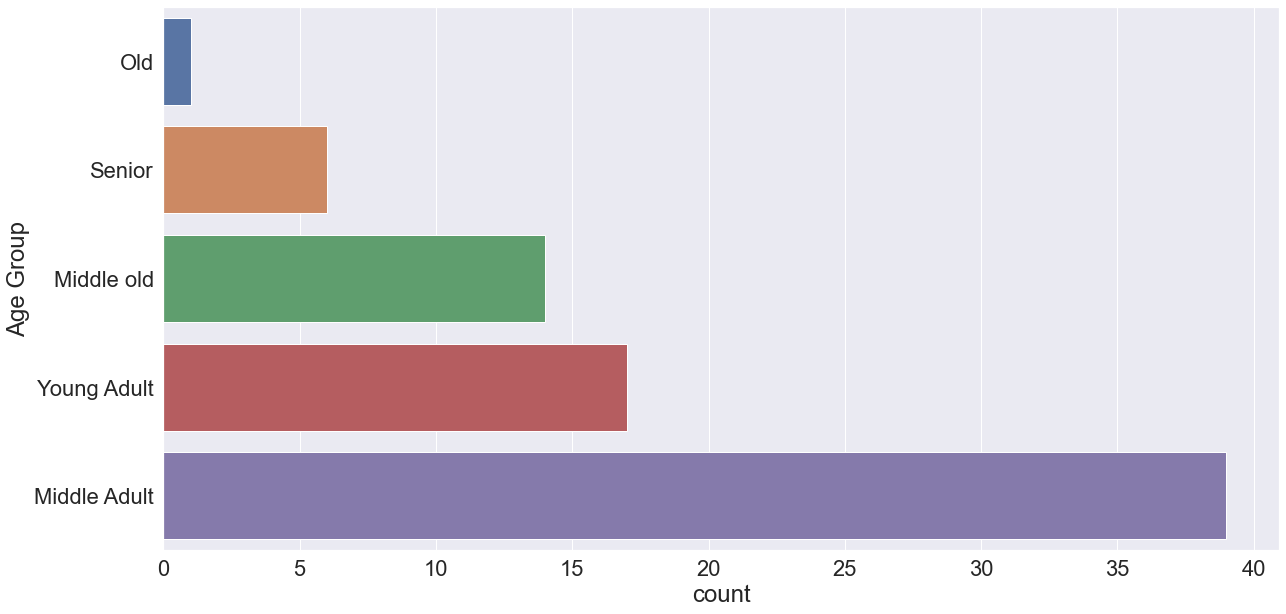

In [79]:
plt.figure(figsize = (20, 10))
sns.countplot(y = 'age_group', data = ride_sharing_sub, 
              order = ride_sharing_sub['age_group'].value_counts(ascending = True).index)
plt.ylabel('Age Group')

The Middle Adult group has had more rides than any other group as depicted in the visualization above.

## Riders' Gender
- How many male riders do we have
- How many female riders do we have
- Association between gender of riders and number of rides (Are the number of rides affected by Gender)

Number of male riders: 58
Number of female riders: 20


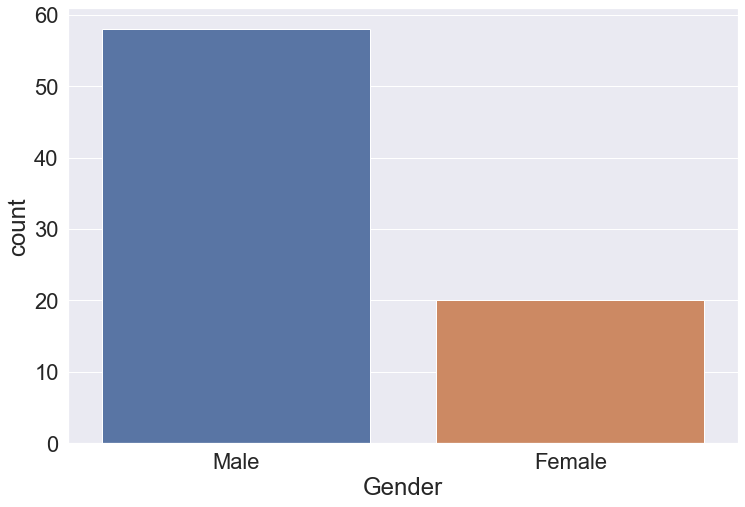

In [94]:
#Number of male and female riders
male_riders = ride_sharing_sub[ride_sharing_sub['user_gender'] == 'Male']
female_riders = ride_sharing_sub[ride_sharing_sub['user_gender'] == 'Female']

print('Number of male riders: {}'.format(len(male_riders)))
print('Number of female riders: {}'.format(len(female_riders)))


plt.figure(figsize = (12, 8))
sns.countplot(data = ride_sharing_sub, x = 'user_gender')
plt.xlabel('Gender')
plt.show()

In [163]:
#Do male riders ride more than female riders?

#Average duration for male riders
male_riders_avg_duration = np.mean(male_riders['duration'])
print('The average duration for male riders is ' + str(male_riders_avg_duration))
print('')
#Average duration for female riders
female_riders_avg_duration = np.mean(female_riders['duration'])
print('The average duration for female riders is ' + str(female_riders_avg_duration))

The average duration for male riders is 10.275862068965518

The average duration for female riders is 8.2


What are the average ages of male and female riders?

In [90]:
#Finding the average age of male riders
male_riders_ages = male_riders['user_age']
mean_age_male = np.mean(male_riders_ages)
print('The average age of male riders is: {:.0f} years'.format(mean_age_male))

female_riders_ages = female_riders['user_age']
mean_age_female = np.mean(female_riders_ages)
print('The average age of female riders is: {:.0f} years'.format(mean_age_female))

The average age of male riders is: 37 years
The average age of female riders is: 38 years


## Most Popular Stations
We can also look into the dataset to find out which of the stations are popular. 
- Which Starting station (Station A)  is more popular?
- Which starting station (Station B) is more popular?

In [39]:
#Finding all the different starting stations
number_of_starting_stations = ride_sharing_sub['station_A_name'].nunique()
print('The number of starting stations is: ' + str(number_of_starting_stations))

The number of starting stations is: 9


In [40]:
#The names of the starting stations
names_of_starting_stations = ride_sharing_sub['station_A_name'].unique()
print('The names of starting stations are: \n{}'.format(names_of_starting_stations))

The names of starting stations are: 
['Berry St at 4th St' 'Powell St BART Station (Market St at 4th St)'
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)'
 'Steuart St at Market St' 'Howard St at Beale St'
 'San Francisco Caltrain (Townsend St at 4th St)'
 'San Francisco Ferry Building (Harry Bridges Plaza)'
 'Montgomery St BART Station (Market St at 2nd St)'
 'Powell St BART Station (Market St at 5th St)']


In [41]:
#Finding all the different final stations
number_of_final_stations = ride_sharing_sub['station_B_name'].nunique()
print('The number of final stations is: ' + str(number_of_final_stations))

The number of final stations is: 45


In [42]:
#The names of the final stations
names_of_final_stations = ride_sharing_sub['station_B_name'].unique()
print('The names of final stations are: \n{}'.format(names_of_final_stations))

The names of final stations are: 
['Broadway at Kearny' 'Eureka Valley Recreation Center'
 'The Embarcadero at Steuart St' 'The Embarcadero at Bryant St'
 '8th St at Brannan St' 'The Embarcadero at Sansome St'
 '17th St at Dolores St' '14th St at Mission St' 'Steuart St at Market St'
 'Victoria Manalo Draves Park' '1st St at Folsom St'
 'Beale St at Harrison St' '23rd St at Tennessee St'
 'Laguna St at Hayes St' '5th St at Folsom' '19th St at Mission St'
 'Davis St at Jackson St' 'San Francisco City Hall (Polk St at Grove St)'
 'Market St at 10th St' 'China Basin St at 3rd St'
 'Valencia St at Clinton Park'
 'Mechanics Monument Plaza (Market St at Bush St)'
 '17th St at Valencia St' '4th St at Mission Bay Blvd S'
 'Jones St at Post St' 'Howard St at 8th St' 'Mississippi St at 17th St'
 'San Francisco Ferry Building (Harry Bridges Plaza)' 'Irwin St at 8th St'
 'McCoppin St at Valencia St' '2nd St at Townsend St'
 'Bryant St at 2nd St' '22nd St Caltrain Station' 'Townsend St at 5th St'
 

Montgomery St BART Station (Market St at 2nd St)             18
Powell St BART Station (Market St at 4th St)                 13
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12
Steuart St at Market St                                       7
Berry St at 4th St                                            7
Howard St at Beale St                                         6
Powell St BART Station (Market St at 5th St)                  6
San Francisco Caltrain (Townsend St at 4th St)                5
San Francisco Ferry Building (Harry Bridges Plaza)            4
Name: station_A_name, dtype: int64


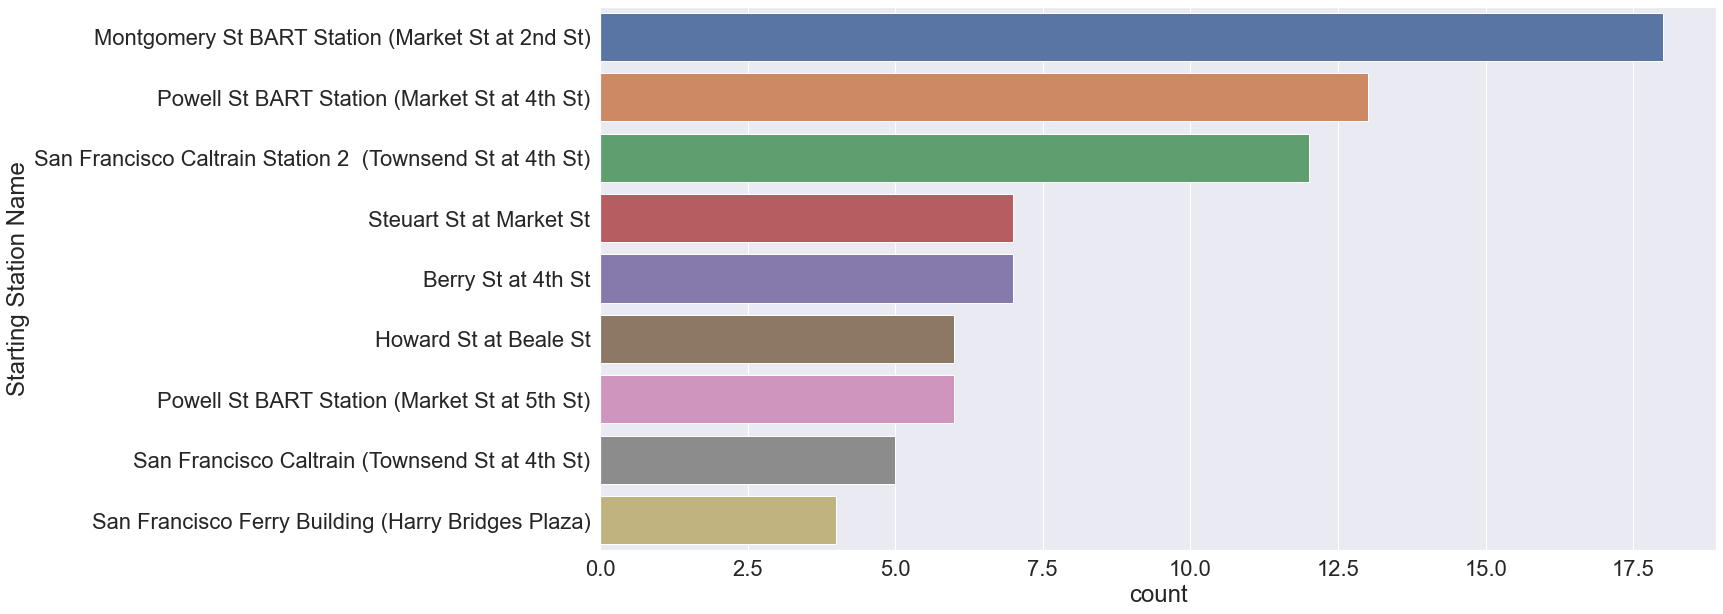

In [80]:
#Most popular starting stations
station_A = ride_sharing_sub['station_A_name'].value_counts()
print(station_A)
#Visualizing the popularity of the starting stations
plt.figure(figsize = (20, 10))
sns.set(font_scale = 2)
sns.countplot(y = 'station_A_name', data = ride_sharing_sub, 
             order = ride_sharing_sub.station_A_name.value_counts(ascending = False).index)
plt.ylabel('Starting Station Name')
plt.show()


It can be seen that the most popular starting station is the `Montgomery St BART Station (Market St at 2nd St)` with the least popular station being `San Francisco Ferry Building (Harry Bridges Plaza)`.

Folsom St at 9th St                                   5
The Embarcadero at Sansome St                         5
Market St at 10th St                                  5
Howard St at 8th St                                   5
The Embarcadero at Bryant St                          3
2nd St at Townsend St                                 3
5th St at Folsom                                      3
4th St at Mission Bay Blvd S                          3
Jones St at Post St                                   2
Steuart St at Market St                               2
Laguna St at Hayes St                                 2
Valencia St at Clinton Park                           2
8th St at Brannan St                                  2
San Francisco City Hall (Polk St at Grove St)         2
Beale St at Harrison St                               2
Broadway at Kearny                                    2
5th St at Brannan St                                  2
Golden Gate Ave at Polk St                      

<AxesSubplot:xlabel='count', ylabel='station_B_name'>

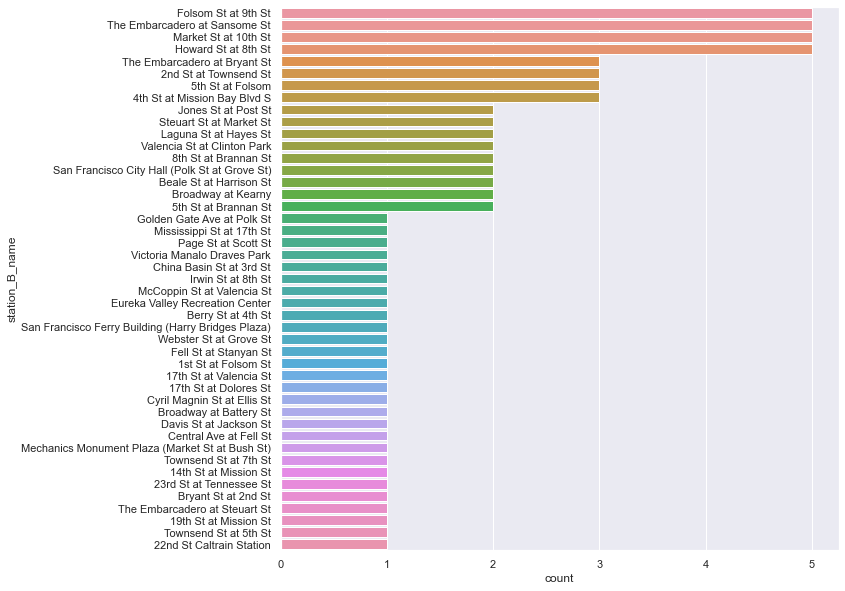

In [62]:
#Most popular final stations
station_B = ride_sharing_sub['station_B_name'].value_counts()
print(station_B)
#Visualizing the popularity of the final stations
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1)
sns.countplot(y = 'station_B_name', data = ride_sharing_sub, 
              order = ride_sharing_sub.station_B_name.value_counts(ascending = False).index)

Here there are four popular final stations namely: 
- `Folsom St at 9th St`  
- `The Embarcadero at Sansome St`
- `Market St at 10th St` 
- `Howard St at 8th St`

## Date and Times
Which months are popular among riders? On which days do riders ride more. And so on. Here I will use the bigger dataset and subset the first 1000. Columns named `month`, `year`, `day` will be created to help with the analysis.

In [98]:
#Getting the 1000 rows of the original dataset I started with.
ride_sharing_1000 = ride_sharing.loc[0: 999].copy()
ride_sharing_1000.head()

#Lets create the user_age and age_group columns for this new subset
ride_sharing_1000['user_age'] = ride_sharing_1000.apply(lambda row: today.year - row['user_birth_year'], axis = 1)

ride_sharing_1000['age_group'] = pd.cut(ride_sharing_1000['user_age'], bins, labels = labels)
ride_sharing_1000.head(3)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_birth_year,user_gender,user_type_cat,duration_time,tire_sizes,ride_date,user_age,age_group
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,1959,Male,2,12,27,2020-06-05,62,Old
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,1965,Male,2,24,26,2019-07-29,56,Senior
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,1993,Male,3,8,27,2020-06-20,28,Young Adult


In [100]:
ride_sharing_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   duration         1000 non-null   object        
 1   station_A_id     1000 non-null   int64         
 2   station_A_name   1000 non-null   object        
 3   station_B_id     1000 non-null   int64         
 4   station_B_name   1000 non-null   object        
 5   bike_id          1000 non-null   int64         
 6   user_birth_year  1000 non-null   int64         
 7   user_gender      1000 non-null   object        
 8   user_type_cat    1000 non-null   category      
 9   duration_time    1000 non-null   int64         
 10  tire_sizes       1000 non-null   category      
 11  ride_date        1000 non-null   datetime64[ns]
 12  user_age         1000 non-null   int64         
 13  age_group        995 non-null    category      
dtypes: category(3), datetime64[ns](1), int64(

In [101]:
#Creating the month column to contain information on the months in which the rides were made

ride_sharing_1000['month'] = ride_sharing_1000.apply(lambda row: row['ride_date'].strftime('%B'), axis = 1)

In [102]:
ride_sharing_1000.head(3)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_birth_year,user_gender,user_type_cat,duration_time,tire_sizes,ride_date,user_age,age_group,month
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,1959,Male,2,12,27,2020-06-05,62,Old,June
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,1965,Male,2,24,26,2019-07-29,56,Senior,July
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,1993,Male,3,8,27,2020-06-20,28,Young Adult,June


Grouping the data points by month and counting the number of bike ids for each group to get a sense of the number of rides that occurred in that month. NB: The data was collected across different years, but then the groupby was performed in irrespective of the years. This will be give the all time month with the highest rides in the dataset. 

In [112]:
#Performing the groupby
months = ride_sharing_1000.groupby('month')['bike_id'].count()
months

month
April         63
August        59
December      70
February      64
January       74
July          51
June          59
March        352
May           57
November      50
October       60
September     41
Name: bike_id, dtype: int64

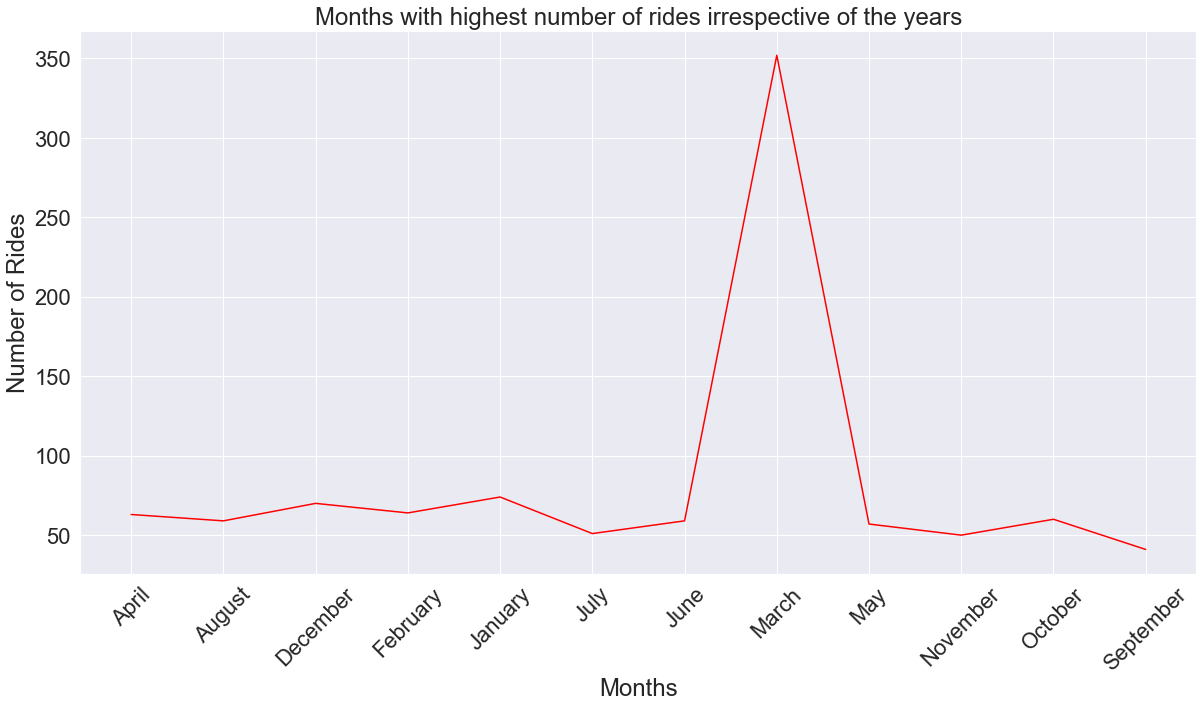

In [111]:
plt.figure(figsize = (20, 10))
plt.plot(months, color = 'red')
plt.xlabel('Months')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 45)
plt.title('Months with highest number of rides irrespective of the years')
plt.show()

The month of the MARCH has been the all time busiest.

The same can be done for the days as well, to see the most popular days among riders. Firstly a new column will created to contain the days information using a lambda function then a groupby and counting the number of bike ids.

In [118]:
#Creating the column
ride_sharing_1000['day'] = ride_sharing_1000.apply(lambda row: row['ride_date'].day_name(), axis = 1)
ride_sharing_1000.head(3)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_birth_year,user_gender,user_type_cat,duration_time,tire_sizes,ride_date,user_age,age_group,month,day
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,1959,Male,2,12,27,2020-06-05,62,Old,June,Friday
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,1965,Male,2,24,26,2019-07-29,56,Senior,July,Monday
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,1993,Male,3,8,27,2020-06-20,28,Young Adult,June,Saturday


In [144]:
#Performing the groupby and count
days = ride_sharing_1000.groupby('day')['bike_id'].count()
days

day
Friday       373
Monday       105
Saturday     105
Sunday       112
Thursday      99
Tuesday       93
Wednesday    113
Name: bike_id, dtype: int64

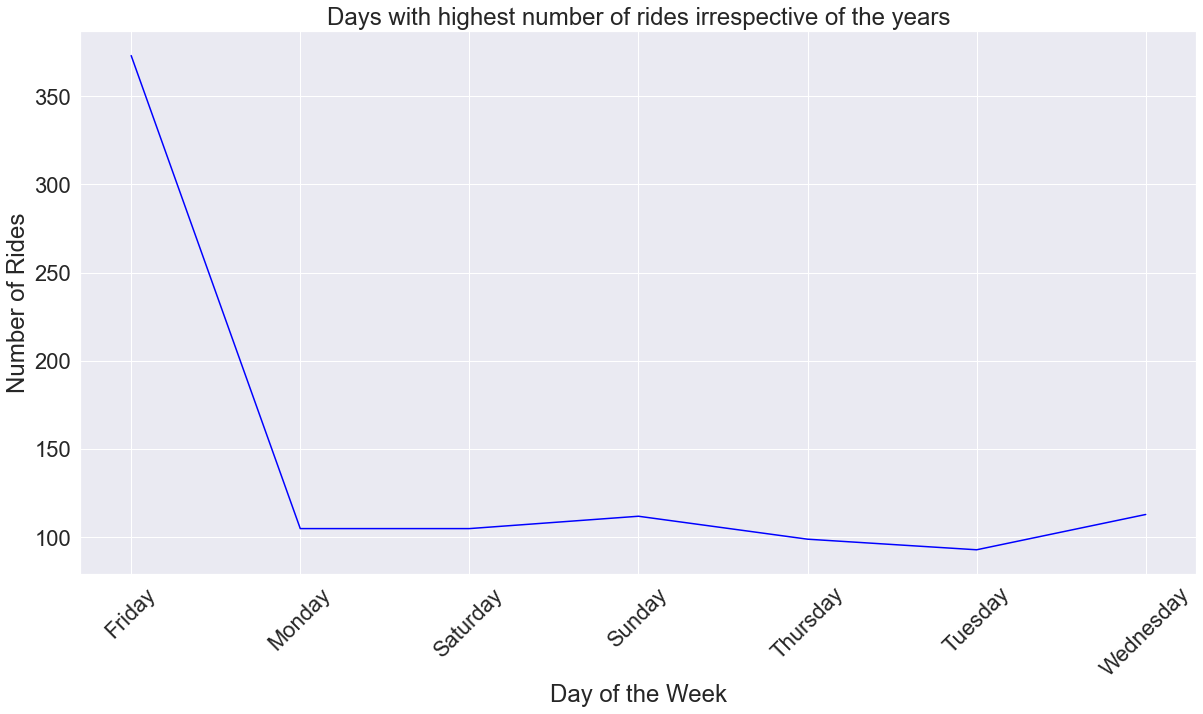

In [122]:
plt.figure(figsize = (20, 10))
plt.plot(days, color = 'blue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 45)
plt.title('Days with highest number of rides irrespective of the years')
plt.show()

In [124]:
ride_sharing_1000['year'] = ride_sharing_1000.apply(lambda row: row['ride_date'].year, axis = 1)
ride_sharing_1000.head(3)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_birth_year,user_gender,user_type_cat,duration_time,tire_sizes,ride_date,user_age,age_group,month,day,year
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,1959,Male,2,12,27,2020-06-05,62,Old,June,Friday,2020
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,1965,Male,2,24,26,2019-07-29,56,Senior,July,Monday,2019
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,1993,Male,3,8,27,2020-06-20,28,Young Adult,June,Saturday,2020


In [125]:
#Performing the groupby and count
years = ride_sharing_1000.groupby('year')['bike_id'].count()
years

year
2017    163
2018    145
2019    180
2020    186
2021    326
Name: bike_id, dtype: int64

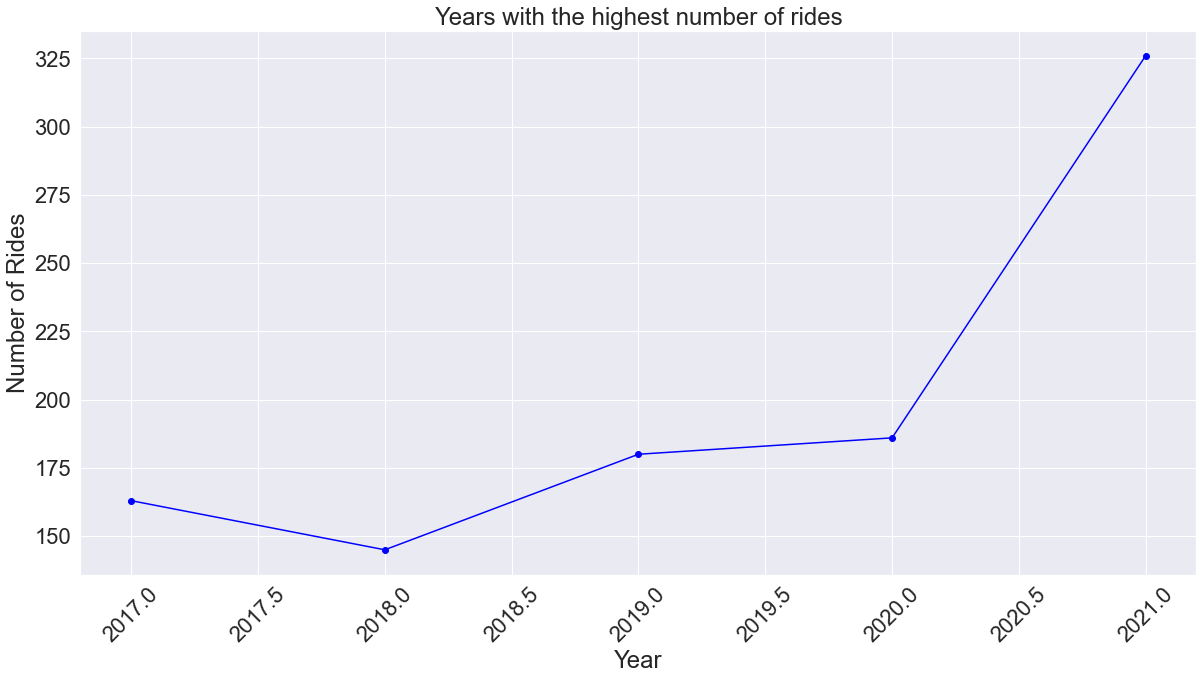

In [157]:
plt.figure(figsize = (20, 10))
plt.plot(years, color = 'blue', marker = 'o')
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 45)
plt.title('Years with the highest number of rides')
plt.show()

### Male vs Female Riders

I decided to use the bigger subset of the dataset, to gain better insights. 
- Do male riders ride more than female riders?
- Is the gender variable associated to the ride duration time?

In [154]:
ride_sharing_1000['user_gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [156]:
ride_sharing_1000['user_gender'].value_counts(normalize = True)

Male      0.734
Female    0.249
Other     0.017
Name: user_gender, dtype: float64

In [151]:
#Duration times based on gender
male_rider_times = ride_sharing_1000[ride_sharing_1000['user_gender'] == 'Male']['duration_time']
female_rider_times = ride_sharing_1000[ride_sharing_1000['user_gender'] == 'Female']['duration_time']

#The average of the duration times
mean_male_rider_times = np.mean(male_rider_times)
mean_female_rider_times = np.mean(female_rider_times)

print('The average riding time for males is {:.2f}'.format(mean_male_rider_times))
print('The averade riding time for females is {:.2f}'.format(mean_female_rider_times))

mean_difference = mean_female_rider_times - mean_male_rider_times
print('The differnce is average male and female rider times is ' + str(round(mean_difference, 2)))

The average riding time for males is 10.64
The averade riding time for females is 12.90
The differnce is average male and female rider times is 2.26


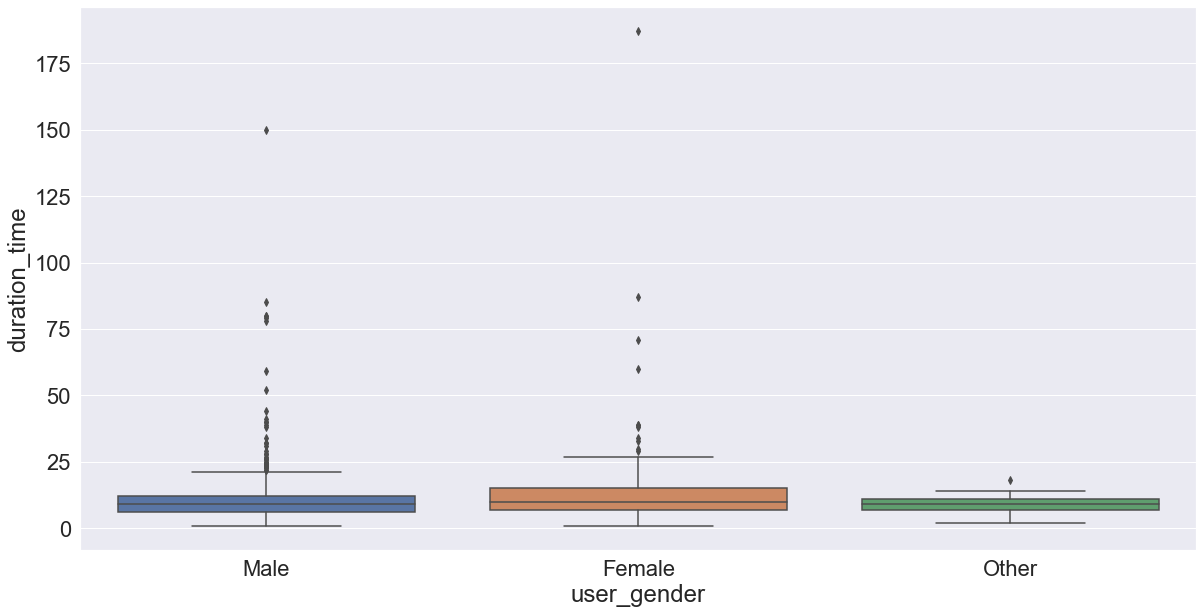

In [152]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = ride_sharing_1000, x = 'user_gender', y = 'duration_time')
plt.show()

<ipython-input-164-1cccd2cdf9db>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_riders = ride_sharing_sub[ride_sharing_1000['user_gender'] == 'Female']
<ipython-input-164-1cccd2cdf9db>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  other_riders = ride_sharing_sub[ride_sharing_1000['user_gender'] == 'Other']


Number of male riders: 734
Number of female riders: 20
Number of other riders: 20


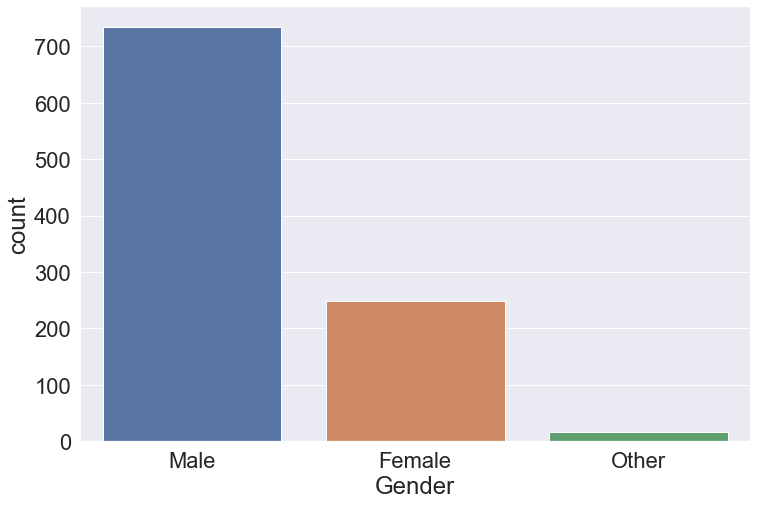

In [164]:
#Number of male and female riders
male_riders = ride_sharing_1000[ride_sharing_1000['user_gender'] == 'Male']
female_riders = ride_sharing_sub[ride_sharing_1000['user_gender'] == 'Female']
other_riders = ride_sharing_sub[ride_sharing_1000['user_gender'] == 'Other']
print('Number of male riders: {}'.format(len(male_riders)))
print('Number of female riders: {}'.format(len(female_riders)))
print('Number of other riders: {}'.format(len(female_riders)))


plt.figure(figsize = (12, 8))
sns.countplot(data = ride_sharing_1000, x = 'user_gender')
plt.xlabel('Gender')
plt.show()

## Conclusion
Though this is not an extensive analysis, it can be seen that some insights have already been uncovered. This is just to show some data cleaning and analysis techinques. I have added extra notebooks to the folder w